In [1]:
import tensorflow as tf
from src.functions import initializers as ci  # i.e., custom initalizers
from src.functions.layers import ActivLin1D  # import the custom activation function
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from src.utils import data_handler as dh
from src.utils import plotter as pl
from train_forward_model import forward_training
from train_inverse_model import inverse_training

## Load forward training set

In [2]:
direct_dataset_path = '/Users/francescomaraschin/Desktop/IntelligentVehicles/LongitudinalControllerNN/Data/csv/forward_profiles.csv'
# Load data
direct_dataset = dh.load_csv(direct_dataset_path)

In [3]:
# Check for NaNs
direct_dataset.isnull().values.any()

False

In [4]:
# Replacing infinite with NaN
direct_dataset.replace([np.inf, -np.inf], np.nan, inplace=True)

# Dropping all the rows with nan values
direct_dataset.dropna(inplace=True)

## Plot the dataset

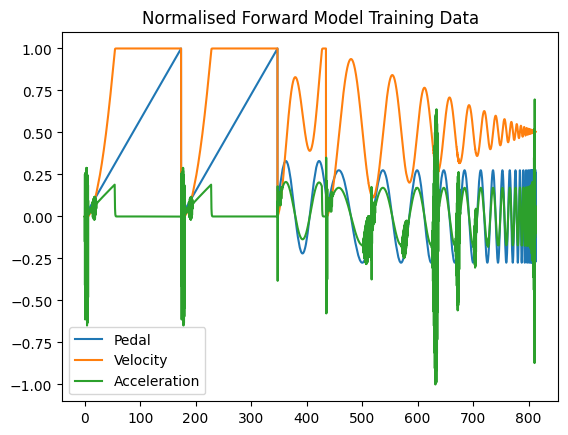

In [5]:
plt.plot(direct_dataset)
plt.title('Normalised Forward Model Training Data')
plt.legend(['Pedal' , 'Velocity' , 'Acceleration'])
plt.show()

## Train the forward model

In [6]:
[forward_model,
     forward_history,
     forward_train_data,
     forward_valid_data,
     time,
     batch_size] = forward_training(direct_dataset)

Metal device set to: Apple M1


2023-02-08 13:46:36.294998: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-02-08 13:46:36.295863: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
2023-02-08 13:46:36.306048: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:354] MLIR V1 optimization pass is not enabled
2023-02-08 13:46:36.309932: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2023-02-08 13:46:36.315935: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-02-08 13:46:36.342973: I tensorflow/core/grappler/optimizers/custom_graph

Model: "custom_activation_model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_vx (InputLayer)          [(100, 10)]          0           []                               
                                                                                                  
 tf_op_layer_strided_slice (Ten  [(100, 1)]          0           ['input_vx[0][0]']               
 sorFlowOpLayer)                                                                                  
                                                                                                  
 tf_op_layer_strided_slice_1 (T  [(100, 1)]          0           ['input_vx[0][0]']               
 ensorFlowOpLayer)                                                                                
                                                                            

2023-02-08 13:46:36.873916: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-02-08 13:46:36.899851: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-02-08 13:46:36.936321: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


11000/11300 [============================>.] - ETA: 0s - loss: 0.0056

/Users/francescomaraschin/Desktop/IntelligentVehicles/LongitudinalControllerNN/NN_Python/venv/lib/python3.9/site-packages/keras/engine/training_v1.py:2332: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates
2023-02-08 13:46:38.672985: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.



Epoch 1: val_loss improved from inf to 0.01371, saving model to /Users/francescomaraschin/Desktop/IntelligentVehicles/LongitudinalControllerNN/Data/trained_models/forward_model/forward_model.h5
11300/11300 [==============================] - 3s 222us/sample - loss: 0.0055 - val_loss: 0.0137
Epoch 2/100
  500/11300 [>.............................] - ETA: 1s - loss: 0.0030

2023-02-08 13:46:39.269953: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-02-08 13:46:39.273602: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-02-08 13:46:39.276891: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-02-08 13:46:39.281617: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-02-08 13:46:39.286698: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-02-08 13:46:39.293041: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-02-08 13:46:39.300612: I tensorflow/core/grappler/optimizers/cust

11100/11300 [============================>.] - ETA: 0s - loss: 0.0042
Epoch 2: val_loss improved from 0.01371 to 0.01325, saving model to /Users/francescomaraschin/Desktop/IntelligentVehicles/LongitudinalControllerNN/Data/trained_models/forward_model/forward_model.h5
11300/11300 [==============================] - 2s 153us/sample - loss: 0.0042 - val_loss: 0.0133
Epoch 3/100
11100/11300 [============================>.] - ETA: 0s - loss: 0.0042
Epoch 3: val_loss did not improve from 0.01325
11300/11300 [==============================] - 2s 149us/sample - loss: 0.0042 - val_loss: 0.0134
Epoch 4/100
10900/11300 [===========================>..] - ETA: 0s - loss: 0.0041
Epoch 4: val_loss did not improve from 0.01325
11300/11300 [==============================] - 2s 150us/sample - loss: 0.0042 - val_loss: 0.0133
Epoch 5/100
11100/11300 [============================>.] - ETA: 0s - loss: 0.0042
Epoch 5: val_loss improved from 0.01325 to 0.01318, saving model to /Users/francescomaraschin/Desktop

2023-02-08 13:49:26.232499: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-02-08 13:49:26.291701: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-02-08 13:49:26.318381: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-02-08 13:49:26.434275: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-02-08 13:49:26.464833: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-02-08 13:49:26.488617: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-02-08 13:49:26.543636: I tensorflow/core/grappler/optimizers/cust

## Plot the results

/Users/francescomaraschin/Desktop/IntelligentVehicles/LongitudinalControllerNN/NN_Python/venv/lib/python3.9/site-packages/keras/engine/training_v1.py:2356: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,
2023-02-08 14:16:25.584372: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


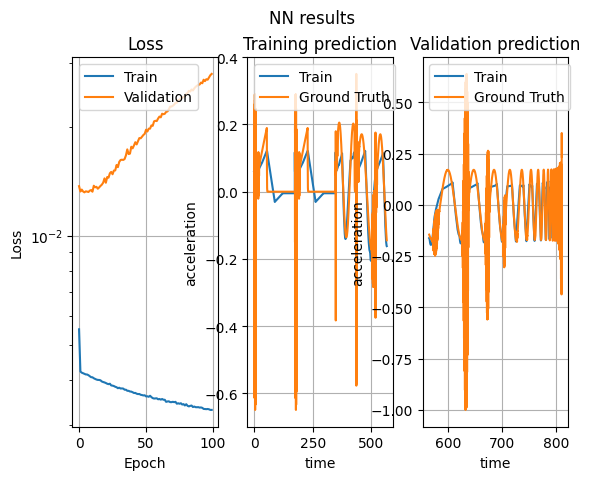

In [7]:
pl.results(model=forward_model,
               history=forward_history,
               dataset=[forward_train_data,
                        forward_valid_data],
               time=time,
               batch_size=batch_size)

## Calculate input for the inverse model

In [25]:
calculated_accelerations_1 = forward_model.predict(forward_train_data[0])
calculated_accelerations_2 = forward_model.predict(forward_valid_data[0])

calculated_accelerations = np.concatenate([calculated_accelerations_1 , calculated_accelerations_2])

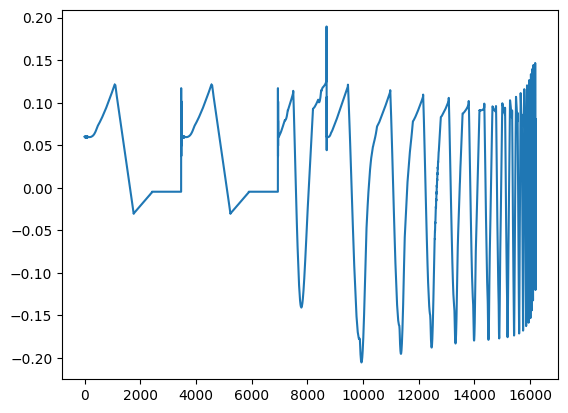

In [26]:
plt.plot(calculated_accelerations)

## Create input dataset for the inverse model

This data set should consist of the accelerations and the velocities

In [60]:
time = pd.read_csv(direct_dataset_path , usecols=['time'])
velocity = pd.read_csv(direct_dataset_path , usecols=['velocity'])
acceleration = pd.DataFrame(calculated_accelerations , columns= ['acceleration'])
pedal = pd.DataFrame(calculated_accelerations , columns= ['pedal'])

In [61]:
inverse_dataset = pd.concat([time , velocity, acceleration , pedal], axis=1)

# Replacing infinite with nan
inverse_dataset.replace([np.inf, -np.inf], np.nan, inplace=True)

# Dropping all the rows with nan values
inverse_dataset.dropna(inplace=True)

# Save inverse dataset to csv to be used in the comparison between the py & C++ models:
pd.DataFrame(inverse_dataset).to_csv("/Users/francescomaraschin/Desktop/IntelligentVehicles/LongitudinalControllerNN/Data/csv/inverse_dataset.csv", header=['time','velocity','acceleration','pedal'], index=None)

inverse_dataset = inverse_dataset.set_index('time')

In [63]:
inverse_dataset

,velocity,acceleration,pedal
time,,,
0.00,-2.942667e-09,0.059912,0.059912
0.05,-2.276415e-08,0.059770,0.059770
0.10,2.092924e-08,0.059651,0.059651
0.15,-3.635123e-07,0.059480,0.059480
0.20,-6.353557e-06,0.059837,0.059837
...,...,...,...
809.75,4.994623e-01,-0.118502,-0.118502
809.80,5.027220e-01,-0.120202,-0.120202
809.85,5.060750e-01,-0.075413,-0.075413


## Train the inverse model

In [36]:
[inverse_model,
     inv_history,
     inv_train_data,
     inv_valid_data,
     time,
     batch_size] = inverse_training(inverse_dataset = inverse_dataset)

KeyError: "None of [Index(['pedal'], dtype='object')] are in the [columns]"

KeyError: 0

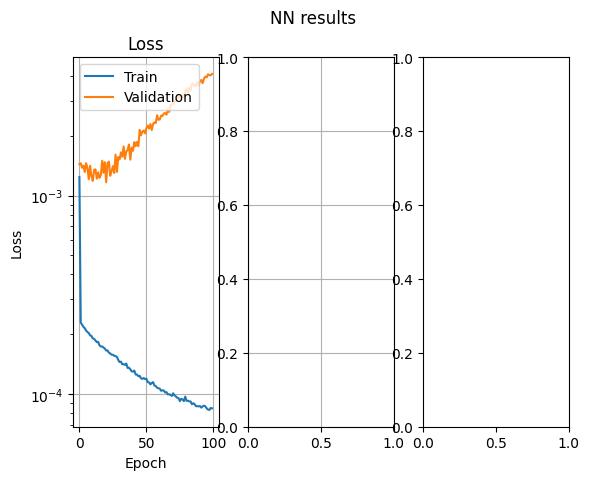

In [52]:
pl.results(model=inverse_model,
               history=inv_history,
               dataset=[inv_train_data,
                        inv_valid_data],
               time=time,
               batch_size=batch_size)

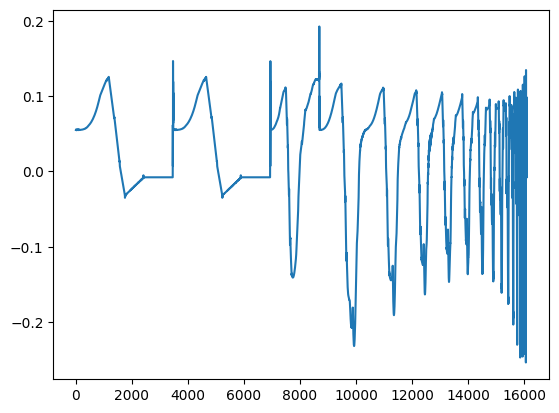

In [53]:
calculated_pedal_1 = inverse_model.predict(inv_train_data[0])
calculated_pedal_2 = inverse_model.predict(inv_valid_data[0])

calculated_pedal = np.concatenate([calculated_pedal_1 , calculated_pedal_2])

plt.plot(calculated_pedal)

# Save Inverse train data to csv file used to verify python vs C++ models

In [17]:
acceleration = [0.059624,0.059353,0.059656,0.059939,0.060241,0.059911,0.059815,0.059599,0.059458,0.059668]
velocity = [0,0,0,0,-0.000006,-0.000054,-0.000407,-0.001846,0.000047,0.001719]

In [18]:
velocity = np.array([velocity] , dtype='float32')
acceleration = np.array([acceleration] , dtype='float32')
input_data = [acceleration , velocity]


In [21]:
prediction = inverse_model.predict( inv_train_data[0] )
prediction

array([[ 0.05518699],
       [ 0.05513398],
       [ 0.05515841],
       ...,
       [-0.13733636],
       [-0.13743138],
       [-0.13774689]], dtype=float32)

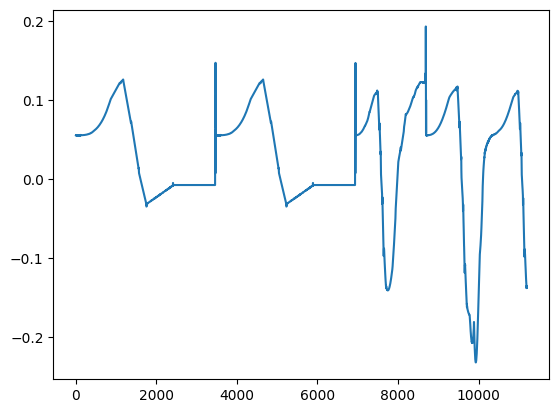

In [20]:
plt.plot(prediction)